In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import datetime
import cv2 as cv

# Goal: Image recognition with multiple categories of images

Importing Test data from a keras cifar10 image dataset

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Assigning each classification of data a label. Grouped the non car classifications together into a 'not an automobile' class

In [9]:
image_name = [None]*10
for i in range (0,10):
    if i == 1:
        image_name[i] = 'Car'
    elif i == 9:
        image_name[i] = 'Commercial Truck'
    else:
        image_name[i] = 'Not an automobile'
classes = len(image_name)

Showing an example training image

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


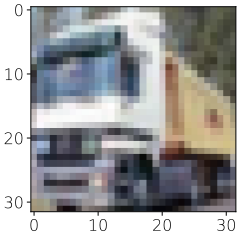

In [10]:
plt.imshow(train_images[1])


Getting the images ready to be processed

In [12]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0
train_labels_hot = keras.utils.to_categorical(train_labels)
test_labels_hot = keras.utils.to_categorical(test_labels)

Creating NN, decided on convolutional. Tried using dense and could not get aboce 30% accuracy

In [14]:
model = keras.Sequential(
[
     layers.Conv2D(input_shape=(32,32,3), kernel_size=(4, 4), filters=8,
                   activation='relu', padding='same'),
     layers.MaxPooling2D(pool_size=(3, 3)),
     layers.Conv2D(32, (4, 4), activation='relu'),
     layers.Dropout(0.5),
     layers.MaxPooling2D(pool_size=(3, 3)),
     layers.Flatten(),
     layers.Dense(32*4*4, activation='relu'),
     layers.Dropout(0.5),
     layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         392       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [17]:
batch_size = 32
epochs = 5

Training the Network. Will run this for longer to see what the upper limit is for accuracy. 

In [18]:
training = model.fit(train_images,train_labels_hot, batch_size=batch_size, epochs=epochs,
                     verbose=1, validation_data=(test_images,test_labels_hot))

Epoch 1/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3391 - accuracy: 0.5230 - val_loss: 1.3583 - val_accuracy: 0.5366
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2925 - accuracy: 0.5383 - val_loss: 1.3166 - val_accuracy: 0.5672
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2516 - accuracy: 0.5556 - val_loss: 1.2974 - val_accuracy: 0.5823
Epoch 4/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2203 - accuracy: 0.5656 - val_loss: 1.2738 - val_accuracy: 0.5844
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1935 - accuracy: 0.5762 - val_loss: 1.2089 - val_accuracy: 0.6137


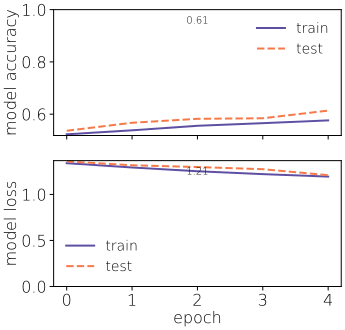

In [20]:
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score = model.evaluate(test_images, test_labels_hot, verbose=0);

# accuracy
ax[0].plot(training.history['accuracy'], color=colors[0])
ax[0].plot(training.history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'test'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

# loss
ax[1].plot(training.history['loss'], color=colors[0])
ax[1].plot(training.history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].text(0.5,0.95,f'{score[0]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[1].transAxes)
ax[1].legend(['train', 'test'], loc='best');

I decided to load in a few images that were not part of the training or testing photos to test the network

Not an automobile


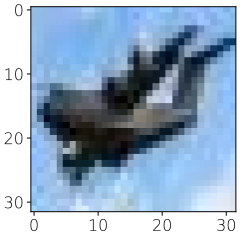

In [42]:
img1 = cv.imread('plane.jpg')
img1 = cv.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
prediction = model.predict(np.array([img1])/255)
index = np.argmax(prediction)
print(image_name[index])

Car


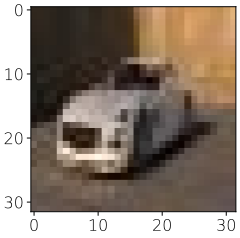

In [40]:
img2 = cv.imread('car.jpg')
img2 = cv.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
prediction = model.predict(np.array([img2])/255)
index = np.argmax(prediction)
print(image_name[index])

Commercial Truck


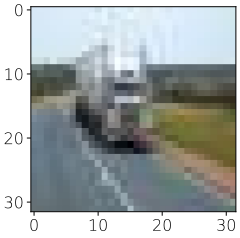

In [46]:
img3 = cv.imread('semi.jpg')
img3 = cv.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
prediction = model.predict(np.array([img3])/255)
index = np.argmax(prediction)
print(image_name[index])

# Refrences

-Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.
-https://www.cs.toronto.edu/~kriz/cifar.html
-https://stackabuse.com/image-recognition-in-python-with-tensorflow-and-keras/
-Stock images from pixabay.com
-https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
